## Movielens clustering

In this Notebook, we are looking for user clusters in the Movielens data, using _k_-means clustering.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #The k-means algorithm

First, let's start by creating a user-item matrix, as explained in the other Notebook.

In [2]:
movie_file = pd.read_csv('movies.csv')
ratings_file = pd.read_csv('ratings.csv')
df = pd.merge(movie_file, ratings_file)

ratings = pd.pivot_table(df, index='userId', columns='title', values='rating')
ratings.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's put the most popular movies at the front.

In [3]:
#This piece of code is a bit complex. Here it is, step by step:
#1. reindex shuffles a dataframe according to a new list
#2. ratings.count() gets the number of non-NaN values per column/movie
#3. sort_values() sort those values, descending (because ascending=False)
#4. finally, .index gets the names of the columns/movies
#axis=1 tells Pandas we want to reshuffle the columns (not the rows)
ratings = ratings.reindex(ratings.count().sort_values(ascending=False).index, axis=1)
ratings.head(3)

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,"Last Wedding, The (Kivenpyörittäjän kylä) (1995)","Last Winter, The (2006)",Last Year's Snow Was Falling (1983),Last of the Dogmen (1995),Late Marriage (Hatuna Meuheret) (2001),Late Night Shopping (2001),Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),"Late Shift, The (1996)",Latter Days (2003),'71 (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,3.0,4.0,5.0,5.0,4.0,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will now find clusters. Unfortunately, the _k_-means algorithm won't work with NaN values. We will put a 0 in the empty cells. This is not ideal for many reasons, but the best we can do for now without getting really complex

In [4]:
ratings_full = ratings.fillna(0) #fill the NaN with the mean of each column
ratings_full.head(3)

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,"Last Wedding, The (Kivenpyörittäjän kylä) (1995)","Last Winter, The (2006)",Last Year's Snow Was Falling (1983),Last of the Dogmen (1995),Late Marriage (Hatuna Meuheret) (2001),Late Night Shopping (2001),Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),"Late Shift, The (1996)",Latter Days (2003),'71 (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,3.0,4.0,5.0,5.0,4.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finish the code below. You need to...
1. Pick a suitable number of clusters (somewhere between 4 and 10 will work)
2. Apply the k-means algorithm to the Movielens user-item matrix that is in the code. Store the cluster predictions in the original `ratings` dataframe and continue working with that dataframe.
3. Print the number of users per cluster (do you remember the relevant Pandas function?).
4. Calculate the mean rating by user cluster using the Pandas pivot_table function. Pandas will sort alphabetically after making the pivot table, so you will need to reorder your pivot table with `my_pivot.reindex(ratings.count().sort_values(ascending=False).index, axis=1)`. Replace `my_pivot` with the name of your pivot table.
5. Examine the mean ratings of the top rated movies by user cluster. Can you describe the user clusters in plain language (e.g., ‘simple-minded action movie lover’)? This may be hard…


In [5]:
km = KMeans(n_clusters=5)
X = ratings_full

In [6]:
km = km.fit(X)

ratings_full['cluster1'] = km.predict(X) #predict the clusters of each observation and store in the dataframe


In [7]:
ratings_full['cluster1'].head()

userId
1    1
2    0
3    0
4    0
5    0
Name: cluster1, dtype: int32

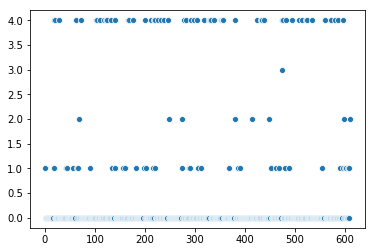

In [8]:
sns.scatterplot(data = ratings_full['cluster1'])

In [45]:
ratings.reindex(ratings.count().sort_values(ascending=False).index, axis =1)


ratings['cluster'] = ratings_full['cluster1']

In [46]:
ratings.head()

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,"Last Winter, The (2006)",Last Year's Snow Was Falling (1983),Last of the Dogmen (1995),Late Marriage (Hatuna Meuheret) (2001),Late Night Shopping (2001),Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),"Late Shift, The (1996)",Latter Days (2003),'71 (2014),cluster
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,3.0,4.0,5.0,5.0,4.0,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,1.0,5.0,1.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,3.0,5.0,NaN,NaN,NaN,NaN,4.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [49]:
ratings2 = pd.pivot_table(data = ratings2, index = 'cluster',  aggfunc = 'mean')

ratings2 = ratings2.reindex(ratings2.count().sort_values(ascending=False).index, axis =1)

ratings2

title,Ocean's Eleven (2001),"Station Agent, The (2003)",Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),"Knight's Tale, A (2001)",Stardust (2007),Stargate (1994),Starship Troopers (1997),Starsky & Hutch (2004),...,Little Big Soldier (Da bing xiao jiang) (2010),Little Boxes (2017),Little Caesar (1931),Little Darlings (1980),Little Dieter Needs to Fly (1997),"Little Drummer Boy, The (1968)","Little Girl Who Lives Down the Lane, The (1976)",Little Lord Fauntleroy (1936),Little Man (2006),'71 (2014)
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.77551,3.750000,4.212418,4.115385,4.140777,3.318182,3.384615,3.364130,3.571429,3.500,...,NaN,4.0,NaN,2.0,5.0,NaN,NaN,NaN,1.0,NaN
1,3.62500,3.166667,4.229730,4.185714,3.828571,3.214286,3.500000,3.238095,2.860000,3.250,...,NaN,NaN,4.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN
2,3.81250,3.833333,4.750000,4.937500,4.812500,3.375000,3.900000,3.500000,3.937500,3.200,...,3.5,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,4.0
3,4.00000,4.000000,4.000000,5.000000,4.000000,3.000000,3.500000,3.500000,2.000000,3.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.00000,3.500000,4.211538,4.340000,4.244898,3.428571,3.730769,3.525000,3.460000,3.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
